# Exploratory Data Analysis

## 1) First do Data Featuring Part - Go and handle the missing values <br>
## 2) Must expertis on Numpy, Seaborn, Pandas & Matplotlib  <br>
## 3) How to handle categorical data
## 4) Feature Selection

# EDA with Python and applying Logistic Regression 

For this lecture we will be working with the "Titanic data set from kaggle". This is a very famous data set and very often is a student's first step in machine learning

We will be trying to predict a classification - survival or deceased. Let's begin our understanding of implementing Logistic Regression in python for classification.

We will use a semi-cleaned version of the titanic data set, if you use the dataset hosted directly on kaggle, you may need to do some additional cleaning. Not show in this lecture

## Important Libraries 

Let's import some libraries to get started!

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)

In [61]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Missing Data Information & Give visualization to dataset

In [62]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [64]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

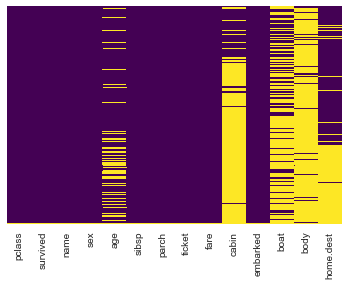

In [65]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

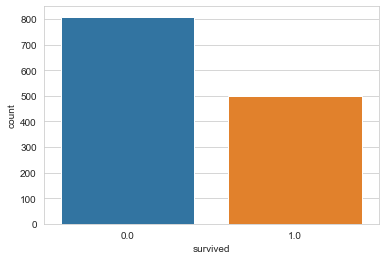

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df)

#Visualizing how many survivied in Titanic accident. 0 - NOt survivied,1 - Survived

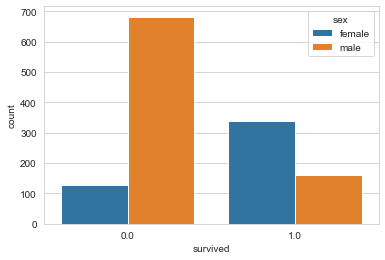

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,hue='sex')

#Visualizing how many survivied in Titanic accident. 0 - NOt survivied,1 - Survived (Differenciated with Sex category)

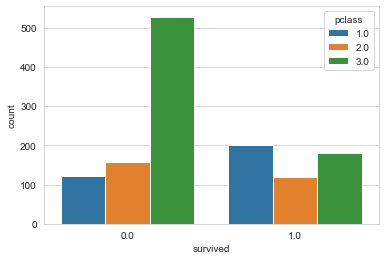

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,hue='pclass')

#Visualizing how many survivied in Titanic accident. 0-NOt survivied,1-Survived (Differenciated with Passenger class category)
#Seems more passengers died from 1st class.

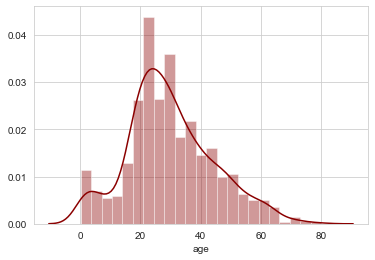

In [69]:
sns.distplot(df['age'].dropna(),kde=True,color='darkred')

#Seems people who died are between age 20-35

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

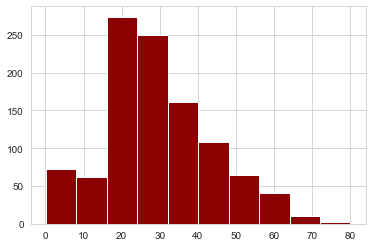

In [70]:
plt.hist(df['age'],color='darkred')

In [71]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

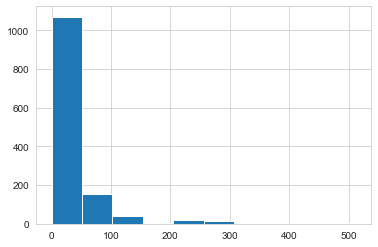

In [72]:
plt.hist(df['fare'])

# Data Cleansing

We want to fill in missing aga data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the avergage age by passenger class. For example

In [73]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


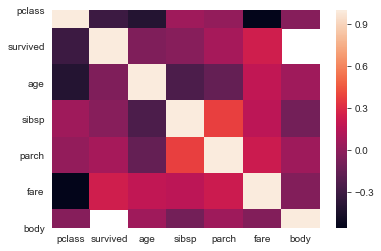

In [74]:
sns.heatmap(df.corr())

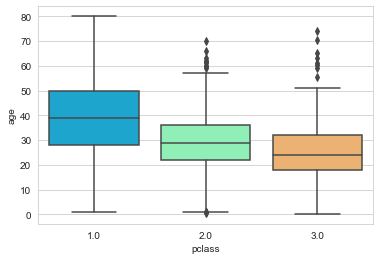

In [75]:
sns.boxplot(x='pclass',y='age',data=df,palette='rainbow')

We can see Age of class1 passengers are high followed by class2 & class3 Passengers. This means wealthier passenger are of more Age.... And poorer passengers are of younger age.

In [76]:
df.groupby('pclass').mean()['age']

pclass
1.0    39.159918
2.0    29.506705
3.0    24.816367
Name: age, dtype: float64

In [77]:
df.loc[(df['pclass']==1) & (df['age'].isnull()) ]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
69,1.0,1.0,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0.0,1.0,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
70,1.0,0.0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0.0,0.0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
74,1.0,0.0,"Clifford, Mr. George Quincy",male,NaN,0.0,0.0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
80,1.0,0.0,"Crafton, Mr. John Bertram",male,NaN,0.0,0.0,113791,26.5500,NaN,S,NaN,NaN,"Roachdale, IN"
106,1.0,0.0,"Farthing, Mr. John",male,NaN,0.0,0.0,PC 17483,221.7792,C95,S,NaN,NaN,NaN


In [78]:
a = df.loc[df['pclass']==1].mean()["age"]
b = df.loc[df['pclass']==2].mean()["age"]
c = df.loc[df['pclass']==3].mean()["age"]
print(a)
print(b)
print(c)

39.15991795774648
29.506704980842912
24.81636726546906


In [79]:
df.loc[(df['pclass']==1) & (df['age'].isnull()),'age'] = a

In [80]:
df.loc[(df['pclass']==1) & (df['age']==a)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,39.159918,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,39.159918,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,39.159918,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,39.159918,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,39.159918,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
69,1.0,1.0,"Chibnall, Mrs. (Edith Martha Bowerman)",female,39.159918,0.0,1.0,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
70,1.0,0.0,"Chisholm, Mr. Roderick Robert Crispin",male,39.159918,0.0,0.0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
74,1.0,0.0,"Clifford, Mr. George Quincy",male,39.159918,0.0,0.0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
80,1.0,0.0,"Crafton, Mr. John Bertram",male,39.159918,0.0,0.0,113791,26.5500,NaN,S,NaN,NaN,"Roachdale, IN"
106,1.0,0.0,"Farthing, Mr. John",male,39.159918,0.0,0.0,PC 17483,221.7792,C95,S,NaN,NaN,NaN


In [81]:
df.loc[(df['pclass']==2) & (df['age'].isnull()),'age'] = b

In [82]:
df.loc[(df['pclass']==3) & (df['age'].isnull()),'age'] = c

In [83]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             1
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [84]:
#Other way to impute data as follows
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    print(Age)
    if pd.isnull(Age):
        if Pclass==1:
            return a
        if Pclass==2:
            return b
        if Pclass==3:
            return c
    else:
        return Age
    
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

29.0
0.9167
2.0
30.0
25.0
48.0
63.0
39.0
53.0
71.0
47.0
18.0
24.0
26.0
80.0
39.15991795774648
24.0
50.0
32.0
36.0
37.0
47.0
26.0
42.0
29.0
25.0
25.0
19.0
35.0
28.0
45.0
40.0
30.0
58.0
42.0
45.0
22.0
39.15991795774648
41.0
48.0
39.15991795774648
44.0
59.0
60.0
41.0
45.0
39.15991795774648
42.0
53.0
36.0
58.0
33.0
28.0
17.0
11.0
14.0
36.0
36.0
49.0
39.15991795774648
36.0
76.0
46.0
47.0
27.0
33.0
36.0
30.0
45.0
39.15991795774648
39.15991795774648
27.0
26.0
22.0
39.15991795774648
47.0
39.0
37.0
64.0
55.0
39.15991795774648
70.0
36.0
64.0
39.0
38.0
51.0
27.0
33.0
31.0
27.0
31.0
17.0
53.0
4.0
54.0
50.0
27.0
48.0
48.0
49.0
39.0
23.0
38.0
54.0
36.0
39.15991795774648
39.15991795774648
39.15991795774648
36.0
30.0
24.0
28.0
23.0
19.0
64.0
60.0
30.0
39.15991795774648
50.0
43.0
39.15991795774648
22.0
60.0
48.0
39.15991795774648
37.0
35.0
47.0
35.0
22.0
45.0
24.0
49.0
39.15991795774648
71.0
53.0
19.0
38.0
58.0
23.0
45.0
46.0
25.0
25.0
48.0
49.0
39.15991795774648
45.0
35.0
40.0
27.0
39.15991795774648
2

24.81636726546906
32.5
38.0
51.0
18.0
21.0
47.0
24.81636726546906
24.81636726546906
24.81636726546906
28.5
21.0
27.0
24.81636726546906
36.0
27.0
15.0
45.5
24.81636726546906
24.81636726546906
14.5
24.81636726546906
26.5
27.0
29.0
nan


In [85]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             1
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

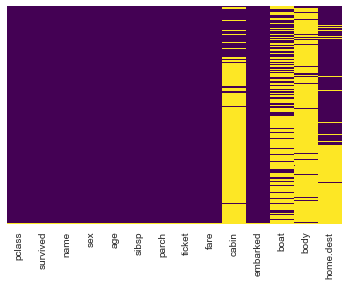

In [86]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Droping Cabin & Embarked column - As there are so much Nan values 

In [89]:
df.drop('cabin',axis=1,inplace=True)  #Removing Cabin column from the dataset

In [90]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [91]:
df.shape

(1310, 13)

# Converting Categorical Features 

We will need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(6)
memory usage: 133.2+ KB


In [93]:
df['embarked'].value_counts()   #We will change two categorical column into ordenal form

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [94]:
pd.get_dummies(df['embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [95]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embarked = pd.get_dummies(df['embarked'],drop_first=True)

In [96]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [97]:
df.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [98]:
df=pd.concat([df,sex,embarked],axis=1)

In [99]:
df.head()

,pclass,survived,age,sibsp,parch,fare,boat,body,home.dest,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,2,NaN,"St Louis, MO",0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1
